**Imports and includes**

In [1]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys
import glob

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [2]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

**Sentiment analysis function provided by Upasana**

In [4]:
def sentiment_analyzer_score_for_englishOnlyTweet(cleaned_tweet): #this function takes in a tweet that has been detected as an english tweet
    score = analyser.polarity_scores(cleaned_tweet) #so this cleaned_tweet is always an english tweet.
    lb = score['compound']
    return lb

**Create list of all Baseline Users**

In [5]:
all_user_lists=[
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv",
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/MentionedBack_Users/Filtered_EnglishUsers_MentionedBackUsers_FINAL.csv",
    '../BeforeAndAfterAnalysis/Filtered_EnglishUsers_DidnotMentionBackUsers.csv',
    '../BeforeAndAfterAnalysis/Filtered_EnglishUsers_MentionBackedUsers.csv']

UserList = []
userPathDict = {}
for i in range(4):  
    df = pd.read_csv(all_user_lists[i])
    tempUserList = list(df['Users'])
    for j in range(len(tempUserList)):
        UserList.append(tempUserList[j])
        if (i == 0) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 1) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 2) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
        elif (i == 3) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
    

In [6]:
UserList = ['rjames1928',
 'BDStan',
 'tylermorrison1',
 '1coolcatman',
 'susanbnj',
 'moscow_ghost',
 'JerylBier',
 'Momfullofhope',
 'MontefioreNYC',
 'DavidMastio',
 'rjames1928',
 'BDStan',
 'tylermorrison1',
 '1coolcatman',
 'susanbnj',
 'moscow_ghost',
 'JerylBier',
 'Momfullofhope',
 'MontefioreNYC',
 'DavidMastio',
 'bobaloo0',
 'BlactimusPrime',
 'UpfrontAfrica',
 'AmericanCitize5',
 'TedJacksonPhoto',
 'HarlemJ11',
 'kddkevin572',
 'MilesToGo13',
 'ResistMoveTRM',
 'OlympiaWatch',
 'JulieZauzmer',
 'tylerkingkade',
 'JamesCMcHann',
 'CuestionMarque',
 'KadriLiik',
 'LiverLipLouie',
 'Kia_Mak',
 'ItsTheBrandi',
 '7777MYNAME',
 'DeWayne236',
 'RealGenie',
 'rocketmetalden',
 'alison_rambles',
 'AshAgony',
 'dmataconis',
 'notarealgrownup',
 'JimKleinpeter',
 'mackenziein6',
 'MEEchelleO',
 'mae_1747',
 'PounderFile',
 'toombstone',
 'CaseyCorbin',
 'RepMattKrause',
 'guy_next_to_me',
 'oceanmaniac',
 'Nigel22222',
 'stpeteyontweety',
 'TheGovernorTWD_',
 'THP_Tweetz',
 'BrettLoGiurato',
 'hrcsupervol01',
 'TheMistressRox',
 'PearlsPolkaDots',
 'heyadiana',
 'SchreckReports',
 'WendyLongNY',
 'BrunoAm05317727',
 'NoSurrender200',
 'KWRose',
 'Kostian_V',
 'budnikBruce',
 'DomKennettLFC',
 'JonesthePoet',
 'jabs611',
 'ltapoll',
 'desjax',
 'mamaswati',
 'douglasernst',
 'mbermani1',
 'ALReporter',
 'timringTV',
 'Vapo_Rob',
 'UsaPete2',
 'LBSBaltimore',
 'tunaofthesky',
 '_ItsMissBre',
 'lindarutter',
 'serr8d',
 'realtimwilliams',
 'MichaelScarbrou',
 'Roni_K_Patriot',
 'ProfDaveAndress',
 'bestnaunieever',
 'DeepThoughts9',
 'JoeC1776',
 'Mwforhr',
 'CSMLuisGonzalez',
 'ScottKimball',
 'MentonGini',
 'IAMJADEJACKSON',
 'GmoneyRainmaker',
 'Holmesdonna1',
 'fred_burton',
 'markpopham',
 'JohnJTerrible',
 'CPO45',
 'nicolesherburne',
 'Sheindie',
 'jbmesser53',
 'BionicBombshell',
 'ChefShwasty',
 'Bexofeasttex',
 'McReaser',
 'Deena_Zaru',
 'bmoreconnected',
 'secretbee2',
 'luckydbldd',
 'vbspurs',
 'USArmy_vet',
 'aaronsayswhat1',
 'GKJill',
 'OrientNewsEn',
 'smidgean',
 'mattwilstein',
 'Fingers_of_Fury',
 'JustCallMeKiku',
 'OutOnTheMoors',
 'ProfessorF',
 'N8VNYCD',
 'charluv2011',
 'clamsroll',
 'rhodes_dawn',
 'ProjectBernie',
 'johnalogue',
 'tinyelvisbkwd',
 'BrettKelman',
 'robertbtracy',
 'lynnie5155',
 'ALakerfan78',
 'SCgal_',
 'GrassrootsJill',
 'bryandhayes1967',
 'chitribopinions',
 'RTMannJr',
 'AntiRacismTv',
 'Richpf',
 'kaylamarie413',
 'TheNewResist',
 'dwsedona',
 'niteowlmom3',
 'Patriot_Ink',
 'faithheadband',
 'eaaknighterrant',
 'lookin_robb',
 'imrayrod',
 'TrumpATeam',
 'simoncrerar',
 'KineticsLive',
 'LesaMonroe',
 'don_haworth',
 'maggieKTVB7',
 'ABPolitical',
 'jbspharmd',
 'Jessberrie',
 'JacobLongSTL',
 'BienSur_JeTaime',
 'multiplebarkasm',
 'RuntotheRight',
 'N1snipe_rv',
 'josephcurl',
 'CdeBOfficial',
 'dealio24',
 'craigflynn1',
 'TopInfoBlogs',
 'AboriginalPress',
 'DonRiedel',
 'MrLukeJohnston',
 'AlleyKat2',
 'bunnyhugger75',
 'aaronlmorrison',
 'alesiavsworld',
 'stefaniei',
 'DonnaDiva',
 'AlecHagel',
 'CharlesHamerle',
 'jeffbradynews',
 'NY199827',
 'DrJaneChi',
 'SynnaSlater',
 'evanlesliejones',
 'TheGeneralAuto',
 'usgunviolence6',
 'Texastweetybird',
 'BirdClanMssngr',
 'RPScott1',
 'meyer_lucas',
 'z56po',
 'MissBeaE',
 'multitasker333',
 'MJoemal19',
 'aidno',
 'NewsPuppet',
 'AndyGilder',
 'wirereporter',
 'postmetrogirl',
 'soit_goes',
 'lfbill',
 'RonicaCleary',
 'Everyday_Muslim',
 'skookerG',
 'melissamarie288',
 'GalacticSneeze',
 'JewsChooseTrump',
 'SaveTheChimps',
 'archangelcrew',
 'Bloviate_Barbie',
 'stevano_b',
 'CatholicsTweet',
 'Steve_Weissman',
 'HashtagSkirmish',
 'zansari8',
 'skeletonpup',
 'Liberty__Q',
 'dramerling',
 'LibertyLynx',
 'Pharaoh_369',
 'vasego1',
 'imfabulous13',
 'ianbateson',
 'HarleyLeBon',
 'benchmarkpol',
 'edwardokeefe',
 'AnneClaireCNN',
 'JSODonoghue',
 'LouisianaKnight',
 'GhostsofDC',
 'KelKass',
 'CarrieWelborn',
 'tchopstl_',
 'Old_BaldFat_Guy',
 'anthonyLfisher',
 'KeepTrumping',
 'Ashlee_Rezin',
 'WashNewsLine',
 'ArvelMauldin',
 'kayewhitehead',
 'jhodnot',
 'MphoAK',
 'cpsemple',
 'TomKierein',
 'rshackelford14',
 'Benjamin_G_Lund',
 'ArizonaPaul',
 'calebmaupin',
 'Quirktastic_co',
 'AliceTeller',
 'PaulaRevere45',
 'AAIUSA',
 'EbThen',
 'donttreadupon',
 'JohnYates327',
 'PDShinkman',
 'dacw10',
 'alshipley',
 'JennElizabethJ',
 'k9rotts',
 'MichaelMBandy',
 'TroyFauber',
 'myfinewords',
 'BreitbartTech',
 'StephPrichard1',
 'SoCaPaul',
 'TrumpRealty',
 'lance4usa',
 'scented444',
 'ShaquilleHoNeal',
 'DarkMattersProj',
 'CherylRenetteBa',
 'HWL53',
 'HoustonMatters',
 'BaconTribe',
 'lindseybieda',
 'Smittyshs',
 'RennaW',
 'USAAssociation',
 'PetesyCarroll',
 'Mr1738',
 'remittancegirl',
 'RepTomMacArthur',
 'DentedNotBroken',
 'loritodd',
 '903GaGa',
 'SignedMom',
 'CelestineBee',
 'chriskingstl',
 'TimJHanrahan',
 'kthorjensen',
 'ConservCityGirl',
 'KennethHoefle',
 'zandywithaz',
 'DavidIRamadan',
 'WinkWestwood',
 'aceofbase',
 'JosephTylerNYC',
 'Stcrow',
 'Teressa_Raiford',
 'Brotherbenx',
 'DeplorableMedia',
 'diamondsnjeans',
 'Crutnacker',
 'TheDoubleclicks',
 'absrdNEWS',
 'DanProft',
 'patrick_hostis',
 'LLopezMooney330',
 'EQUIPTO',
 'TheIndyTV',
 'CanisPundit',
 'Crutch4',
 'Steve_R_Walker',
 'OGOrlandoJones',
 'SoCalMike_SD',
 'Kindhearted2015',
 'defendernetwork',
 'truckerbooman',
 'CleavageCrumbs',
 'iBeSuckaFree',
 'ScottStavrou',
 'PhunPhactory',
 'krom1781',
 'Jayne720',
 'WillametteM',
 'DanaBougon',
 'dotcom30rock',
 'BWorthingtonIII',
 'inikoblue',
 'redrivergrl',
 'truestormlover',
 'cberrl',
 'ItsNotPersonal0',
 'newsondowntown',
 'OaklandPostNews',
 'chadsdaddy',
 'ManUpUAll',
 'Raffiwilliams',
 'bgg2wl',
 'JSavoly',
 'DannyTarkanian',
 'remarkabel65706',
 'kann_brooks',
 'rickgladstone',
 'AndreasCNN',
 'APDillon_',
 'MissJupiter1957',
 'jasonnobleIA',
 'lifebythecreek',
 'MaggieKent6abc',
 'DeaconessBlues',
 'IanMolony',
 'bigsexy_tote',
 'SSbridges51',
 'donaldcclarke',
 'HouseBenghazi',
 'JBaileysMom',
 'ncaprio',
 'smbeckley',
 'DoveSoars',
 'tonyzump',
 'dances',
 'WTAJnews',
 'oritperlov',
 'PiperDewn',
 'Ohun_Ashe',
 'Purrpatrol',
 '_TonyBriscoe',
 'circuitsurgeon',
 'cristymsilva',
 'MaryForbes14',
 'NYSAnimal',
 'DammitErin',
 'David_in_Dallas',
 'harleypyrate02',
 '120yearz',
 'XxHappypills',
 'MikeBastasch',
 'HDGregg',
 'DomesticGoddss',
 'SCOTUSPlaces',
 'MORNINGMANIAC',
 '5thEstateShow',
 'ohululu',
 'lions_us',
 'Read_N_Learn',
 'MsNLasVegas',
 'LdyNJ1',
 'pixelkitties',
 'brianscully',
 'scoccaro',
 'TariqToure',
 'andrewmcgahon_',
 'FightNowAmerica',
 'CherBear162',
 'GGnotGIGI713',
 'AdamShawNY',
 'DGSpeaks',
 'bentlyg2003',
 'MrsNomer_',
 'CGAdamo',
 'mckra1g',
 'LRNROSE',
 'franblandy',
 'HPMpolitics',
 'TheUnlikelyGame',
 'Lilly_Works',
 'redhed67',
 'BackPageGuyNYDN',
 'MissAmericaPie',
 'ReticentTurnip',
 'jrbixby',
 'truth_american',
 'SmartBlackMan',
 'PaulDollery',
 'Nakko60',
 'SheilaDFerguson',
 'lailamuhammad',
 'JenD1974',
 'LizziePhelan',
 'Avitusparta',
 'CnstantPaul',
 'Craigipedia',
 'R2PPet',
 'TheBarbaraGame',
 'TheDaleJackson',
 'lmegordon',
 'TeemalGames',
 'GavanCasey',
 'MattFnWallace',
 'NerdyNegress',
 'AlyLovesMovies',
 'MotherGoos3',
 'rlmeena',
 'CandaceSmith_',
 'jupiter896',
 'HillaryforCO',
 'Darinstrauss',
 'jcarrickzilla',
 'Sir_Max',
 'smokntoes',
 'fud31',
 'abeaujon',
 'swebs',
 'TrumpCommsHQ',
 'JeritRoser',
 'ArtemisPics',
 'JohnKennedyLA',
 'jacaristar',
 'mstern68',
 'MarylandTwang',
 'winwarchr',
 'CarlosMuhammad1',
 'EricWolfson',
 'imau2fan',
 'leighmunsil',
 'KFoleyFL',
 'sabatnov',
 'HeartEyes4Brady',
 'RedHatGeek',
 'RepBrianBabin',
 'Lynn_onward',
 'OutlawRepub',
 'DarleneHBrook',
 'djbenhameen',
 'TnucTew',
 'ToLiveUnchained',
 'BlckGirlsMatter',
 'HKX07',
 'BrentScher',
 'punnycat_is_me',
 'noodlez56',
 'elliosch',
 'femmina',
 'USEmbTallinn',
 'justingeorge',
 'MikeRBlackman',
 'karen58Romans',
 'DeplorableSunny',
 'ChrisCPandolfo',
 'MamaB_L',
 'LoKeys910',
 'ScarlettDear1',
 'maturefinancier',
 'tannous_mouawad',
 'violinhunter',
 'LLH713',
 'noprezzie2012',
 'jennfarrar7',
 'knkcattle',
 'PoliticDeb',
 'OSPREY675',
 'Reasons4Thought',
 'LionsOmega',
 'ryanra',
 'F22Ross',
 'MTopkat3852',
 'clarissamehler',
 'RNRMaryland',
 'shelliecorreia',
 'OpenUpTheUSANOW',
 'xformed',
 'SaadAbedine',
 'arrowsmithwoman',
 'sjs856',
 'twillnurse',
 'ceconomou56',
 'Ez4u2say_Janis',
 'SileMichaela',
 'lynmacjay',
 'drgurner',
 'WA_SusanD',
 'ShoeKat',
 'PeckPolitics',
 'PattieCurran',
 'sandykjack',
 'jasondecker55',
 'WhosFibbing',
 'CarlaRK3',
 'RussVet1',
 'nanci_pray2jc',
 'DesertRiver',
 'phemale61',
 'solaranoir',
 'GodHasThisNow',
 'Rose_Marie_3',
 'DocDarnell',
 'jewbaby57',
 'nousgnostic',
 'BYHISGRACE64',
 'grammasu52',
 'Colette4Cruz',
 'AprilAvril123',
 'TexitDarling',
 'reFocusZone',
 'ZenaTweets2',
 'craigmiller383',
 'whirrll',
 'ErinMitchell411',
 'beerscouts',
 'dwthompson1945',
 'AnnoGalactic',
 'liberitarian',
 'Jeepen_LewisE',
 'PoliticallyLib',
 'anniefoutz',
 'Elle_Vien',
 'TexasDamnit',
 'AGentleThunder',
 'propapergirl',
 'SheriHerman10',
 'AVD911',
 'JRobertSmith1',
 'DragonForce_One',
 'adbridgeforth',
 'SherieSmith7',
 'search4swag',
 'SergeDevant',
 'RobPulseNews',
 'jensan1332',
 'loman920',
 'jimmylemons',
 'BillyBoysDaddy',
 'Mannix1925',
 'Saamprater',
 'xmssweetnessx',
 'mhmhart',
 'Lil_Baked_Baker',
 'MikeBates',
 'USAmerica2A',
 'usplaymoney',
 'BobMarzulli',
 'DT48RasTanura',
 'NOONELOVESMENOW',
 'TrydecafCoffey',
 'indiegop',
 'jsavite',
 'MissSweets2',
 'OnARoll_Winning',
 'AlikaHope',
 'iamDrWill',
 'Eccentrie',
 'CarolHusband',
 'SociallySherri',
 'wjappe',
 'LoveMyPotus2',
 'KarinBorjeesson',
 'ForMotionCreatv',
 'JoeKoffee',
 'harleyb11',
 'diamondgirl2222',
 'Suzloveslife',
 'shylohg',
 'MichaelLee2009',
 'uwsp46',
 'SethFromThe716',
 'ForQ2',
 'VeraVanHorne',
 'T_FisherKing',
 'prolifebuttons',
 'MarshallFSmith',
 'TruthTeamOne',
 'itsYourGrace',
 'Mammagistweetin',
 'WeWhoDieSaluteU',
 'BKaysac',
 'MarkRay1980',
 'Pissyfits',
 'noreallyhowcome',
 'Kaygirl8Lawana',
 'P226_Sig',
 'WiseBanyanTree',
 'RoyBatty010816',
 'relombardo3',
 'clw4usa',
 'BaburRealer',
 'Dubzzzinyaface',
 'RenagadeGirl',
 'PoliticalAnt',
 'Missilito',
 'idawhannadoyou',
 'LibertarianMike',
 'veggie64_leslie',
 'ukloner',
 'JodyCoyote12',
 'LeslieDy4',
 'UghToHillary',
 'frgrab_frank',
 'JENNZEE5',
 'snoozinglion1',
 'DcLincoln761',
 'hopdog777',
 'martylawson',
 'OuttaStateNate',
 'de_caverne',
 'ARC4Freedom',
 'real_vt16',
 'IFThunder',
 'WitmerCarl',
 'jmb063',
 'mytinx',
 'TrivagoD',
 'DanCas2',
 'DivintyMary',
 'Enjoneer01',
 'RonPaul4Constit',
 'Malinka1102',
 'MrVeritas',
 'Benito35ddDavis',
 'DonnaMartinNeth',
 'marklindesr',
 'autumnrainwater',
 'Luminaria98',
 'rockinrobyn59',
 'Hardlanding',
 'stef4freedom',
 'FestusWalker',
 'JJRavenation52',
 'DrMcKuKu',
 'AlisonSpalding2',
 'GlasnostGone',
 'PecosRoyBean',
 'AveryChasten',
 'PaulaDuvall2',
 'lidialopinto',
 'Mama3Cubs',
 'obbibb',
 'historianspeaks',
 'ryanfield',
 'jmmdshr1',
 'ManiaMaiden',
 'ASFried',
 'KathyMschotschi',
 'DerenicByrd',
 'RWITGuy',
 'oldhickory49',
 'VickiGP1',
 'Scgator1414',
 'Para_glider69',
 'Tamaralynn212',
 'miamidecor',
 'glenn_mcneil',
 'LifeforceVibes',
 'Nymnurse',
 'RandomIgnorance',
 'NormaConnors',
 'denver_rose',
 'wolfiemouse',
 'g_kraig',
 'PennylessChurch',
 'PeacefulStreets',
 'BooBooNyc',
 'HEINSLERJAN',
 'raincoaster',
 'tommyhubb',
 'HaloChiefPO117',
 'c3y5000',
 'Serafinos',
 'royalistajoe',
 'Amercans4YPG',
 'marilynkj',
 'ldy_chris',
 'maribellezza',
 'NickReeves45',
 'zhynaryll',
 'dpmoran1962',
 'WITHDRAWN2',
 'Recook63Russell',
 'ConnieAustinTX',
 'TudorCityLady',
 'walkerkpt',
 'fixurheart2016',
 'MacBetty',
 'denlusk13',
 'ForgottenProf',
 'ahomeforlayla',
 'dijoni',
 'Donadeedooda',
 'streetbear57',
 'DananaMama',
 'jmj4life7',
 'Wook316',
 'CarrieKHutchens',
 'toolguybak',
 'LisaAlesci',
 'LaurieSpoon',
 'ckolacia',
 'xmethuselahx',
 'jaazee1',
 'Atomic_Blonde__',
 'MRMitchnet',
 'retiredfirecapt',
 'GregFlippen',
 'Nessa_Star4',
 'csbjaf',
 'agolfcourse',
 'Ticishafer',
 'EzraDrissman',
 'SmartWomenTrump',
 'ReetuKabra',
 'drivn2xl',
 'sleepydorkharry',
 'TwistaAnonymous',
 'beingrichard',
 'FergusonCoverUp',
 'fancygap1',
 'needajobbad',
 'pcook102',
 'rsamer',
 'BaySolidarity',
 'LHolloway2',
 'AutumnNAlston',
 'SethShaffer',
 'PhantomNuts',
 'thatrebelgirl8',
 'RealOrangeCat',
 'Punder_Woman',
 'dontspeakforme',
 'ThePoliticalHat',
 'johnjoh60',
 'HEIDI10USA',
 'deutschheute',
 'SweetLilSassyMe',
 'malbertnews',
 'Joanisays1',
 'Dinkiedow',
 'huegolden',
 'carltoersbijns',
 'PoliScrutiny101',
 'afed3352',
 'BackPageGuyNYDN',
 'PattiaGarder',
 'agrimm34',
 'Muffin192',
 'PsychicStoner',
 'ValleyPatriot',
 'HolyUSASpirit',
 'LilPolkSalad',
 'bad_robot_57',
 'deenike',
 'NonLiberalPAer',
 'BellDavidC',
 'ItsNiecesPieces',
 'pastorbones',
 'MenesesRudy',
 'PamelaRosePhd',
 'Stone_Marley',
 'sc007kc',
 'urbanscripter',
 'stevie_mat',
 'tufkaa',
 'mampebbles',
 'only_si_chuck',
 'syriaintel',
 'joelengel',
 'PassTheTe',
 'LukeTipoki',
 'miketymofie',
 'Counselor70',
 'Norseman86',
 'JohnFPLane',
 'GaryFSmith411',
 'MiloWear1A',
 'CnnOliver',
 'sfpodge',
 'POPCORN_C_MAPCA',
 'LindaDono',
 'VTDiva01',
 'Gabi4Trump',
 'BobPriceBBTX',
 'Mit_Bit',
 '777Grace4USA',
 'alketrolyat',
 'bbrewerstandup',
 'turnips7333',
 'realdavedoubleu',
 'Daleyinsanity',
 'DisThingsOfOurs',
 'NowBuyWithMe',
 'ophelporhush',
 'carlie_kollath',
 'LeaSavoy',
 'shazzer42000',
 'hoetierrez',
 'marknyt',
 'KT_thomps',
 'JamiahAdams',
 'brijoyce',
 'Mr_Bob_Dobalina',
 'fuzzysemi',
 'muffnbear',
 'Parker_Votes',
 'thecrowdview',
 'mrmik1234',
 'CrimsonTideWes',
 'weirdsavant',
 'gavonl',
 'MelindaLMorris',
 'StarSpangled9',
 'pattykake44',
 '9589smith',
 'ChadHarvey7',
 'TedJoy71',
 '_OneEyedFatMan_',
 'mancave_tv',
 'JohnnyMack_',
 'mwendwa__',
 'leftyguitar1',
 'jacobleadership',
 'Carl_Dix',
 'jacquesditte',
 'rwmccrory',
 'Artfull01',
 'TomOrr777',
 'ShadowDogProd',
 'unlikelyfanatic',
 'Wiswell',
 'willcollier',
 'REALDANIELGLENN',
 'Ronp42',
 'ross1coe',
 'MatthewKick',
 'heavyfuel1204',
 '1800Randy',
 'BlackSoulFood',
 'FuriousFarmBoy',
 'emilymlane',
 'JanaBlade1',
 'bastias54',
 'AngelaKorras',
 'Zombie_Kitv2',
 'TrumpLandslide',
 'lusciouslindaw',
 'ToastedKennyD',
 'TheGiftOfMayhem',
 'AwkwardHandle',
 'So_New_York',
 'DeniseSawyerTV',
 'SamanthaSilver0',
 'zullnero',
 'thomasa56',
 'AmandaOcasio1',
 'LewisVCrumley2',
 'JanaeFrazier',
 'Rockin4America',
 'Sisters4everT',
 'icebergslim1047',
 'AryehCW',
 'HollyHollywood8',
 '1stungun',
 'KVeklerov',
 'LyndaMick',
 'WhiskyHaze',
 'AnthonyBialy',
 'JORESHIC',
 'Burn1Lynn',
 'TheOddDuckling',
 'vbagate',
 'jenradcliffe',
 '62Seabee',
 'gomartyman',
 'HashtagAfterDrk',
 'TayoMarciano',
 'jlsell24',
 'whyitmatters',
 'CheapSeats411',
 'WideAwake35',
 'mefatheeh',
 'SofieJV',
 'JeffreyusaSmith',
 'KimKiilu',
 'Netjeretkhau',
 'AgentKrid',
 'RosieR1949',
 'JedKMeshew',
 'jonareeves6127',
 'cruzincaribbean',
 'TMikaMouse',
 'CommissionerKY',
 'the_kaylasmith',
 'BaronBlacky',
 'NCbgirl',
 'monalisa4068',
 'Spudfish83',
 'JohnnyCauthen',
 'LMihaLove',
 'GKMCBmore',
 'RaqiyahMays',
 'Cutrolosophy',
 'bevels_perry',
 'tmorris504',
 'C_Rnold',
 'desertrat0073',
 'weblollipop1',
 'navymig',
 'soulcandyd',
 'Rpiper07',
 'gkates',
 'EnkiSpeaking',
 'sumbodysbabygrl',
 'math_tagger',
 'CatalenaNikole',
 'TeachNotGive',
 'i_Lean',
 'kristadb1',
 'Ransoms_Note',
 'sabrinasquireva',
 'WmWallace1911',
 'JRNoblin',
 'tpel78',
 'Artist06730777',
 'toniriza3',
 'ssdharmaz',
 'Chewbacca_Sound',
 'Beanmimo',
 'dapixara',
 'ElledgeLeon',
 'ohworriesme',
 'TheRealJmar',
 'windsurf13',
 'MarylandTwang',
 'TheMaverick21',
 'TheMistressRox',
 'jimmywhiz',
 'Damon_AF',
 'aturnauer',
 'LiaoLiaoLu',
 'N9ZF',
 'oneunionmom',
 'TimeTravelnMan',
 'TylerLaRiviere',
 'alphatango4141',
 'fuegopazzo',
 'BornToBeGOP',
 'JeffNBCBoston',
 'LadyGrassroot',
 'LennieJarratt',
 'ZEUSofQLF',
 'ChuckMa85672384',
 'shan34976498',
 'Sasha_Dominique',
 'ranchdancer',
 'KbomzKevin',
 'HeyLannyCamden',
 'grandmatobe',
 'GregGonsky',
 'BlueFalcon3P',
 'timvicious',
 'JonStreet',
 'mitchtrout',
 'DreadHead_46',
 'calatayud7',
 'IanMolony',
 'KawumaBulayimu',
 '1371_Ben',
 'RikiTikiTorrre',
 'ericdeabill',
 'FrancisJeffrey7',
 'BrushingOff',
 'JackieVasser',
 'cubbiebear2o18',
 'RealStirfryguy',
 'jamesnorth7',
 'MAGAfaith',
 'LiianVarus',
 'realSi_jeff',
 'IvorCrotty',
 'DanaBoos3',
 'jonhartmannjazz',
 '4eyesJohnny',
 'amyzworldamy',
 'ChrisLLavers',
 'mgreer423',
 'AnnaShapkina10',
 'Liberty__Q',
 'MarcSantia4NY',
 'RieMcAz',
 'MrDespicable',
 'Ginger4Trump',
 'agerenesh',
 'Ozymandiasdust',
 'JamesLBrowning',
 'HoorayBacon',
 'Phil_Buck',
 'outrageous74',
 'txrattletattle',
 'NolanHack',
 'Maddie_Marshall',
 'PrinceApocolysp',
 'RevRodFitz1954',
 'RB4444',
 'KimberlyNix4',
 'msdayvt',
 'TheSiouxfan',
 'Cavalier6',
 'WillRabbe',
 'MzzzMariah',
 'illuminati391',
 'PaulaFeese',
 'kayewhitehead',
 '2_SynnCeer4',
 'branfire',
 'donttreadupon',
 'NotAntiSemitic',
 'spiderlou2099',
 'jj1331',
 'Skycop1',
 'chetbtester',
 'TheMovement',
 'N0_Fabrication',
 'adriennefunny',
 'summert02',
 'thatdangdingus',
 'PhiladelphiaCP',
 'corockymtns',
 'CureHipHop',
 'Dendirtcheap',
 'Colony14',
 'Kadrews1964',
 'A2Mac',
 'JooHyun_Kang',
 'BobZa222',
 'GunnetteP',
 'SheaButtaBaddie',
 'maybealmost',
 'tblack',
 'Jusuke500',
 'Wonder_Chick_',
 'VTO2020',
 'JewishOdysseus',
 'Voters4Kasich',
 'Lin_Baker',
 'Ruin2day',
 'manjrn',
 'GooGwaba',
 'ward_reckly456',
 'MzMaryKhalaf',
 'mysickbones',
 'MrsPatriot3',
 'CasablancaRic',
 'texasgirltweets',
 'mrjc1',
 'meyer_lucas',
 'GuitaristDom',
 'mikepfingston2',
 'TheTomGeorge',
 'kdaywins',
 'JustPhilD',
 'hotelplanner',
 'VPDTrafficUnit',
 'TheRealMattL',
 'wolverines_dad',
 'MikeGDoesThings',
 'NewsPuppet',
 'maganewsnetwork',
 'jewiwee',
 'KingofMunsters1',
 'irishgino',
 'punman',
 'mentalerase',
 'heiressarts',
 'MarcBennett_',
 'MzMollyTL',
 'michael_house9',
 'CoryLHughes',
 'EintheD1',
 'nateclark',
 'IanFHood',
 'drjelks',
 '1manueltorres',
 'BradleyBGroover',
 'JamesMeroney',
 '_MoCowBell_',
 'thejenn999',
 'hotshot1_',
 'AnnieOakey222',
 'FromNazWithLove',
 'BobSmith4152',
 'Lacy0902',
 'FornariSense',
 'Ward4Anderson',
 'Xpressionable',
 'Deb_Libby',
 'Fadedessence',
 'JamboR1989',
 'sobeit22',
 'TriciaEdwards2',
 'terileemcclain',
 'KellyEekockopp',
 'Just_A_Joe',
 'HarryIsaacJr',
 'amperg33',
 'GenXtremist',
 'GBabeuf',
 'patriotusa77b',
 'Miny_K',
 'Tonyg04456745',
 'RosarioReynos10',
 'dmgmater64',
 'BeezakaMrB',
 'RobinJohnson54',
 'jimishbathia',
 'dynamex',
 'Zoot16',
 'CliffJump101',
 'granny_st',
 '_MUDUTU_',
 'RogueIconoclast',
 'indiegop',
 'ww1wga',
 'bakerlarry84',
 'coachdb181',
 'Maq_one',
 'SophiaLamar1',
 'Morrison7Rhonda',
 'mielewealth',
 'aobrien9',
 'Viccimn',
 'NZBystander',
 'HaleyTessIsis',
 'enyawkram',
 'pagansexgod',
 'CarlaBGood',
 'dem_happy',
 'bucci2028',
 'KeepItRealist',
 'Teddyshouse2II',
 'sigche',
 'SkePatt',
 'geophf',
 'BDBgoldens3',
 'alvarez787815',
 'karldickey',
 'retirednbored',
 'TrevorLeatham',
 'fjm1947',
 'just_old_joe',
 'zhynaryll',
 'wallen48',
 'Moondizog',
 'LiliMoM',
 'ToddHeadleeAZ',
 '6ofmyown',
 'gcain63',
 'LordNishar',
 'TeamHudson11',
 'barbara3d',
 'MastaOfMp3s',
 'ZoomZanne',
 'laura_garvock',
 'cruzananddiet',
 'RickSforza',
 'Hood_Genius',
 'DeVon_FNMfan2K8',
 'VelleyVelle_',
 'Sheeple101',
 'ARM1976',
 'IsaboSalem',
 'Fieryreddragon',
 'walta1237',
 '4FollowingJesus',
 'SparrowOnTheEye',
 'gwbehn',
 'mdcolli',
 'melaniesgore',
 'RawlingsBob',
 'HankusMackimus',
 'ArmAndProtect',
 'redwardprice719',
 'angelfitzpat51',
 'MeOnAJourney',
 'MaidenWatford',
 'laudreport',
 'Peta_de_Aztlan',
 'SaberGato',
 'guarino_carolyn',
 'darlene1980',
 'Benross75',
 'KrajacicJodi',
 'jjconceptsinc',
 'AnnHuss',
 'ItsMsCoCo',
 'lorik_maga18',
 'Outofnames',
 'BlackjediNow',
 'RacerX393',
 'Patrici82841064',
 'don85375',
 'JARosenberg12',
 'sherry_1999',
 'cykelly1718',
 'JohnDelacour',
 'Fiorentina5',
 'rastasprincess',
 'Withmyflawsnall',
 'CortneyWarwick',
 'Daytonanurse',
 'redbuddhadojo',
 'exposes_racism',
 'TaveresQuixote',
 'axelmojave',
 'apwriter',
 'Ella_Boo_Bella',
 'dave_cpt',
 'gramps97',
 'Catrocky22',
 'brunosunshine',
 'paulaspaulatics',
 'BrainFooood',
 'kmcccomcastnet',
 'samcm1',
 'UtilityInfieldr',
 'TMurph207',
 'kujakupoet',
 'flashmolly',
 'R_n_GA',
 'DavidTheNative',
 'jilltataraworld',
 'FeeBooths',
 'StayWokeBot',
 'RantsOutloud',
 'JandRHendricks',
 'MtinaMorgan',
 'rspin122112',
 'MissTimiTimz',
 'dsherr13',
 'mobygrapefan',
 'LucynGOP',
 'thenurse75',
 'Paul1958John',
 'sargef1',
 'Bliadhnaichean',
 'meequalsfree',
 'mike_datlof',
 'MzNatTurner',
 'ringgoldsandra',
 'primal1screams',
 'SphallSteve1245',
 'kabalissima',
 'ellelljaytoo',
 'DaPrincessJoJo',
 'topcota1SG',
 'leonhardtmindy',
 'DougDoodles',
 'silverbfly',
 'MOVEprofPHD',
 'treehugger1605',
 'Pulpiteer',
 'derrold',
 'artfantasystudi',
 'LAtakestheCAKE',
 'edfomeara',
 'NoraBAmes',
 'zvjezdanpatz',
 'resedajohn',
 'Lost94133',
 'connieketchup',
 'tolovana66',
 'LayDaye',
 '12voltman60',
 'ChocnessMonsta',
 'PatrioTrumpet',
 'michaelbickle',
 'BrickONeil',
 'cnare',
 'NDH_j_m_f',
 'veritas_24',
 'Yehudi3',
 'WaywardToadSage',
 'papermonkeynz',
 'WeWhoDieSaluteU',
 'knowsey',
 'Valnofux',
 'JackCarrWasHere',
 'madbarrister',
 'zsdgf',
 'Bill_Owen',
 'Naahledge',
 'iBeSuckaFree',
 'Politicaltwain1',
 'JodyCoyote12',
 'bsg1949',
 'WayWEcIT']

In [7]:
print("Number of possibly affected users: " + str(len(UserList)))

Number of possibly affected users: 1331


In [8]:
# with open('pau_all.txt', 'w') as filehandle:
#     for listitem in UserList:
#         filehandle.write('%s\n' % listitem)

**Functions to check for a mention of Donald Trump or Hillary Clinton in a tweet**

In [9]:
def mentions_trump(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'realdonaldtrump':
                return True
    return False

In [10]:
def mentions_clinton(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'hillaryclinton':
                return True
    return False

**Calculate monthy values for each user (over the 96 months from Jan 2009 to December 2016)**

In [11]:
timelineDict = {}

In [12]:
firstTweetIndexDict = {}

In [13]:
timelineDF = pd.DataFrame(columns=['username','tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

In [14]:
size = str(len(UserList))
for i in range(len(UserList)):
# for i in range(100):
    try:
        #read in, reverse order (so oldest is first), reset index
        temp_user_db = pd.read_csv(userPathDict[UserList[i]]+UserList[i]+'.csv', header=None, low_memory=False)
        temp_user_db = temp_user_db.iloc[::-1]
        temp_user_db.reset_index(drop=True, inplace=True)

        #create lists for each metric
        tweet_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        trump_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        clinton_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0]
        sentiment_scores = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        trump_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        clinton_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        positive_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]
        negative_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[]]

        #iterate through user tweets
        first = 1
        for j in range(len(temp_user_db)):

            #step one is assigning an index for the tweet, based on date, or disregarding
            found = 0
            tweetdate = dt.strptime(temp_user_db[3][j], "%Y-%m-%d")
            for k in range(2009,2017):
                temp_year = k
                date_start = dt(temp_year,1,1)
                date_end = dt(temp_year,12,31)
                if tweetdate < date_start:
                    continue;
                elif tweetdate <= date_end:
                    for m in range(2,14):
                        if m == 13: #month must be December by process of elimination
                            use_index = (((k-2009)*12)+(m-2))
                            found = 1
    #                         print(temp_user_db['date'][j] + " " +str(use_index))
                            break;
                        next_month_start = dt(temp_year,m,1)
                        if tweetdate < next_month_start:
                            use_index = (((k-2009)*12)+(m-2))
                            found = 1
    #                         print(temp_user_db['date'][j] + " " +str(use_index))
                            break;

            #tweet occurred within the period 2009-2016 and was assigned an valid index
            if found == 1:
                if first:
                    firstTweetIndexDict[UserList[i]] = use_index
                    first = 0

                tweet_count[use_index] +=1

                tweet_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                sentiment_scores[use_index].append(tweet_sent)

                trump_flag = mentions_trump(str(temp_user_db[11][j]))
                clinton_flag = mentions_clinton(str(temp_user_db[11][j]))

                if trump_flag: trump_count[use_index] += 1
                if clinton_flag: clinton_count[use_index] += 1

                if trump_flag and not clinton_flag: trump_sent[use_index].append(tweet_sent)
                if clinton_flag and not trump_flag: clinton_sent[use_index].append(tweet_sent)

                if tweet_sent > 0: positive_sent[use_index].append(tweet_sent)
                if tweet_sent < 0: negative_sent[use_index].append(tweet_sent)

        timelineDict[UserList[i]] = [tweet_count, sentiment_scores, trump_count, clinton_count, 
                                     trump_sent, clinton_sent, positive_sent, negative_sent]

        print(str(i) + " / " + size)

    except Exception as e: 
        print(str(UserList[i]) + " failed - " + str(e))

        

0 / 1331
1 / 1331
2 / 1331
3 / 1331
4 / 1331
5 / 1331
6 / 1331
7 / 1331
8 / 1331
9 / 1331
10 / 1331
11 / 1331
12 / 1331
13 / 1331
14 / 1331
15 / 1331
16 / 1331
17 / 1331
18 / 1331
19 / 1331
20 / 1331
21 / 1331
22 / 1331
23 / 1331
24 / 1331
25 / 1331
26 / 1331
27 / 1331
28 / 1331
29 / 1331
30 / 1331
31 / 1331
32 / 1331
33 / 1331
34 / 1331
35 / 1331
36 / 1331
37 / 1331
38 / 1331
39 / 1331
40 / 1331
41 / 1331
42 / 1331
43 / 1331
44 / 1331
45 / 1331
46 / 1331
47 / 1331
48 / 1331
49 / 1331
50 / 1331
51 / 1331
52 / 1331
53 / 1331
54 / 1331
55 / 1331
56 / 1331
57 / 1331
58 / 1331
59 / 1331
60 / 1331
61 / 1331
62 / 1331
63 / 1331
64 / 1331
65 / 1331
66 / 1331
67 / 1331
68 / 1331
69 / 1331
70 / 1331
71 / 1331
72 / 1331
73 / 1331
74 / 1331
75 / 1331
76 / 1331
77 / 1331
78 / 1331
79 / 1331
80 / 1331
81 / 1331
82 / 1331
83 / 1331
84 / 1331
85 / 1331
86 / 1331
87 / 1331
88 / 1331
89 / 1331
90 / 1331
91 / 1331
92 / 1331
93 / 1331
94 / 1331
95 / 1331
96 / 1331
97 / 1331
98 / 1331
99 / 1331
100 / 1331

755 / 1331
756 / 1331
757 / 1331
758 / 1331
759 / 1331
760 / 1331
761 / 1331
762 / 1331
763 / 1331
764 / 1331
765 / 1331
766 / 1331
767 / 1331
768 / 1331
769 / 1331
770 / 1331
771 / 1331
772 / 1331
773 / 1331
774 / 1331
775 / 1331
776 / 1331
777 / 1331
778 / 1331
779 / 1331
780 / 1331
781 / 1331
782 / 1331
783 / 1331
784 / 1331
785 / 1331
786 / 1331
787 / 1331
788 / 1331
789 / 1331
790 / 1331
791 / 1331
792 / 1331
793 / 1331
794 / 1331
795 / 1331
796 / 1331
797 / 1331
798 / 1331
799 / 1331
800 / 1331
801 / 1331
802 / 1331
803 / 1331
804 / 1331
805 / 1331
806 / 1331
807 / 1331
808 / 1331
809 / 1331
810 / 1331
811 / 1331
812 / 1331
813 / 1331
814 / 1331
815 / 1331
816 / 1331
817 / 1331
818 / 1331
819 / 1331
820 / 1331
821 / 1331
822 / 1331
823 / 1331
824 / 1331
825 / 1331
826 / 1331
827 / 1331
828 / 1331
829 / 1331
830 / 1331
831 / 1331
832 / 1331
833 / 1331
834 / 1331
835 / 1331
836 / 1331
837 / 1331
838 / 1331
839 / 1331
840 / 1331
841 / 1331
842 / 1331
843 / 1331
844 / 1331
845 / 1331

In [15]:
len(firstTweetIndexDict)

1176

In [16]:
for i in range(len(timelineDF)):
    try:
        test = firstTweetIndexDict[timelineDF['username'][i]]
    except:
        print(timelineDF['username'][i] + ' failed [' +str(i)+']' )

In [17]:
timelineDF = pd.DataFrame.from_dict(timelineDict, orient='index',columns=['tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

timelineDF.index.name = 'username'
timelineDF.reset_index(inplace=True)


In [18]:
len(timelineDF)

1307

In [19]:
tweet_countDict = {}
sentiment_scoresDict = {}
trump_countDict = {}
clinton_countDict = {}
trump_sentDict = {}
clinton_sentDict = {}
positive_sentDict = {}
negative_sentDict = {} 

In [20]:
size = str(len(timelineDF))
for i in range(len(timelineDF)):
    try:
        start_index = firstTweetIndexDict[timelineDF['username'][i]]

        tweet_count = []
        sentiment_scores = []
        trump_count = []
        clinton_count = []
        trump_sent = []
        clinton_sent = []
        positive_sent = []
        negative_sent = [] 

        for j in range(0,96):
            if j >= start_index:
                tweet_count.append(timelineDF['tweet_count'][i][j])
                trump_count.append(timelineDF['trump_count'][i][j])
                clinton_count.append(timelineDF['clinton_count'][i][j])

                if(len(timelineDF['sentiment_scores'][i][j]) > 0):
                    sentiment_scores.append(statistics.mean(timelineDF['sentiment_scores'][i][j]))
                else:
                    sentiment_scores.append(np.nan)

                if(len(timelineDF['trump_sent'][i][j]) > 0):
                    trump_sent.append(statistics.mean(timelineDF['trump_sent'][i][j]))
                else:
                    trump_sent.append(np.nan)

                if(len(timelineDF['clinton_sent'][i][j]) > 0):
                    clinton_sent.append(statistics.mean(timelineDF['clinton_sent'][i][j]))
                else:
                    clinton_sent.append(np.nan)

                if(len(timelineDF['positive_sent'][i][j]) > 0):
                    positive_sent.append(statistics.mean(timelineDF['positive_sent'][i][j]))
                else:
                    positive_sent.append(np.nan)

                if(len(timelineDF['negative_sent'][i][j]) > 0):
                    negative_sent.append(statistics.mean(timelineDF['negative_sent'][i][j]))
                else:
                    negative_sent.append(np.nan)

            else:
                tweet_count.append(np.nan)
                trump_count.append(np.nan)
                clinton_count.append(np.nan)
                sentiment_scores.append(np.nan)
                trump_sent.append(np.nan)
                clinton_sent.append(np.nan)
                positive_sent.append(np.nan)
                negative_sent.append(np.nan)

        tweet_countDict[timelineDF['username'][i]] = tweet_count
        sentiment_scoresDict[timelineDF['username'][i]] = sentiment_scores
        trump_countDict[timelineDF['username'][i]] = trump_count
        clinton_countDict[timelineDF['username'][i]] = clinton_count
        trump_sentDict[timelineDF['username'][i]] = trump_sent
        clinton_sentDict[timelineDF['username'][i]] = clinton_sent
        positive_sentDict[timelineDF['username'][i]] = positive_sent
        negative_sentDict[timelineDF['username'][i]] =  negative_sent 

        print(str(i) + " / " + size)
        
    except Exception as e: 
        print(str(timelineDF['username'][i]) + " failed - " + str(e))

rjames1928 failed - 'rjames1928'
1 / 1307
2 / 1307
3 / 1307
4 / 1307
5 / 1307
6 / 1307
7 / 1307
8 / 1307
9 / 1307
10 / 1307
11 / 1307
12 / 1307
13 / 1307
14 / 1307
15 / 1307
16 / 1307
17 / 1307
18 / 1307
19 / 1307
20 / 1307
21 / 1307
JamesCMcHann failed - 'JamesCMcHann'
23 / 1307
24 / 1307
25 / 1307
26 / 1307
27 / 1307
28 / 1307
DeWayne236 failed - 'DeWayne236'
30 / 1307
rocketmetalden failed - 'rocketmetalden'
32 / 1307
33 / 1307
34 / 1307
35 / 1307
36 / 1307
mackenziein6 failed - 'mackenziein6'
38 / 1307
39 / 1307
40 / 1307
41 / 1307
42 / 1307
43 / 1307
44 / 1307
oceanmaniac failed - 'oceanmaniac'
46 / 1307
47 / 1307
48 / 1307
49 / 1307
50 / 1307
hrcsupervol01 failed - 'hrcsupervol01'
52 / 1307
53 / 1307
54 / 1307
55 / 1307
56 / 1307
57 / 1307
NoSurrender200 failed - 'NoSurrender200'
59 / 1307
60 / 1307
budnikBruce failed - 'budnikBruce'
62 / 1307
63 / 1307
jabs611 failed - 'jabs611'
65 / 1307
66 / 1307
67 / 1307
68 / 1307
69 / 1307
70 / 1307
71 / 1307
72 / 1307
UsaPete2 failed - 'Us

592 / 1307
593 / 1307
594 / 1307
595 / 1307
596 / 1307
597 / 1307
598 / 1307
599 / 1307
600 / 1307
601 / 1307
602 / 1307
603 / 1307
604 / 1307
605 / 1307
606 / 1307
607 / 1307
608 / 1307
609 / 1307
610 / 1307
611 / 1307
612 / 1307
613 / 1307
614 / 1307
615 / 1307
616 / 1307
617 / 1307
618 / 1307
619 / 1307
620 / 1307
621 / 1307
622 / 1307
623 / 1307
624 / 1307
625 / 1307
626 / 1307
627 / 1307
628 / 1307
629 / 1307
630 / 1307
631 / 1307
632 / 1307
633 / 1307
634 / 1307
635 / 1307
636 / 1307
637 / 1307
638 / 1307
639 / 1307
640 / 1307
641 / 1307
642 / 1307
643 / 1307
644 / 1307
645 / 1307
646 / 1307
647 / 1307
648 / 1307
649 / 1307
650 / 1307
651 / 1307
652 / 1307
653 / 1307
654 / 1307
655 / 1307
656 / 1307
657 / 1307
658 / 1307
659 / 1307
AveryChasten failed - 'AveryChasten'
661 / 1307
662 / 1307
663 / 1307
664 / 1307
665 / 1307
666 / 1307
667 / 1307
668 / 1307
669 / 1307
670 / 1307
671 / 1307
672 / 1307
673 / 1307
674 / 1307
675 / 1307
676 / 1307
677 / 1307
678 / 1307
679 / 1307
680 / 

1200 / 1307
1201 / 1307
1202 / 1307
1203 / 1307
1204 / 1307
1205 / 1307
1206 / 1307
1207 / 1307
1208 / 1307
1209 / 1307
1210 / 1307
BlackjediNow failed - 'BlackjediNow'
1212 / 1307
1213 / 1307
1214 / 1307
1215 / 1307
1216 / 1307
1217 / 1307
1218 / 1307
1219 / 1307
1220 / 1307
1221 / 1307
1222 / 1307
1223 / 1307
1224 / 1307
1225 / 1307
TaveresQuixote failed - 'TaveresQuixote'
1227 / 1307
1228 / 1307
1229 / 1307
1230 / 1307
1231 / 1307
1232 / 1307
1233 / 1307
1234 / 1307
1235 / 1307
1236 / 1307
1237 / 1307
1238 / 1307
1239 / 1307
1240 / 1307
1241 / 1307
1242 / 1307
1243 / 1307
1244 / 1307
1245 / 1307
1246 / 1307
1247 / 1307
1248 / 1307
1249 / 1307
1250 / 1307
1251 / 1307
1252 / 1307
1253 / 1307
1254 / 1307
1255 / 1307
1256 / 1307
1257 / 1307
1258 / 1307
1259 / 1307
1260 / 1307
1261 / 1307
1262 / 1307
1263 / 1307
1264 / 1307
1265 / 1307
1266 / 1307
1267 / 1307
1268 / 1307
1269 / 1307
1270 / 1307
1271 / 1307
1272 / 1307
1273 / 1307
1274 / 1307
1275 / 1307
1276 / 1307
1277 / 1307
1278 / 130

In [21]:
tweet_countDF = pd.DataFrame.from_dict(tweet_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
tweet_countDF.index.name = 'username'
tweet_countDF.reset_index(inplace=True)
tweet_countDF = tweet_countDF.drop(columns=['username'])

trump_countDF = pd.DataFrame.from_dict(trump_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
trump_countDF.index.name = 'username'
trump_countDF.reset_index(inplace=True)
trump_countDF = trump_countDF.drop(columns=['username'])

clinton_countDF = pd.DataFrame.from_dict(clinton_countDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
clinton_countDF.index.name = 'username'
clinton_countDF.reset_index(inplace=True)
clinton_countDF = clinton_countDF.drop(columns=['username'])

sentiment_scoresDF = pd.DataFrame.from_dict(sentiment_scoresDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
sentiment_scoresDF.index.name = 'username'
sentiment_scoresDF.reset_index(inplace=True)
sentiment_scoresDF = sentiment_scoresDF.drop(columns=['username'])

trump_sentDF = pd.DataFrame.from_dict(trump_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
trump_sentDF.index.name = 'username'
trump_sentDF.reset_index(inplace=True)
trump_sentDF = trump_sentDF.drop(columns=['username'])

clinton_sentDF = pd.DataFrame.from_dict(clinton_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
clinton_sentDF.index.name = 'username'
clinton_sentDF.reset_index(inplace=True)
clinton_sentDF = clinton_sentDF.drop(columns=['username'])

positive_sentDF = pd.DataFrame.from_dict(positive_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
positive_sentDF.index.name = 'username'
positive_sentDF.reset_index(inplace=True)
positive_sentDF = positive_sentDF.drop(columns=['username'])

negative_sentDF = pd.DataFrame.from_dict(negative_sentDict, orient='index',columns=['01-2009','02-2009','03-2009','04-2009','05-2009','06-2009','07-2009','08-2009','09-2009','10-2009','11-2009','12-2009',
'01-2010','02-2010','03-2010','04-2010','05-2010','06-2010','07-2010','08-2010','09-2010','10-2010','11-2010','12-2010',
'01-2011','02-2011','03-2011','04-2011','05-2011','06-2011','07-2011','08-2011','09-2011','10-2011','11-2011','12-2011',
'01-2012','02-2012','03-2012','04-2012','05-2012','06-2012','07-2012','08-2012','09-2012','10-2012','11-2012','12-2012',
'01-2013','02-2013','03-2013','04-2013','05-2013','06-2013','07-2013','08-2013','09-2013','10-2013','11-2013','12-2013',
'01-2014','02-2014','03-2014','04-2014','05-2014','06-2014','07-2014','08-2014','09-2014','10-2014','11-2014','12-2014',
'01-2015','02-2015','03-2015','04-2015','05-2015','06-2015','07-2015','08-2015','09-2015','10-2015','11-2015','12-2015',
'01-2016','02-2016','03-2016','04-2016','05-2016','06-2016','07-2016','08-2016','09-2016','10-2016','11-2016','12-2016'])
negative_sentDF.index.name = 'username'
negative_sentDF.reset_index(inplace=True)
negative_sentDF = negative_sentDF.drop(columns=['username'])

In [22]:
# timelineDF.to_pickle("./PAU_timelineDF_090320.pkl")

In [23]:
tweet_countDF.to_pickle("./PAU_Q2_tweet_countDF_090320.pkl")
trump_countDF.to_pickle("./PAU_Q2_trump_countDF_090320.pkl")
clinton_countDF.to_pickle("./PAU_Q2_clinton_countDF_090320.pkl")
sentiment_scoresDF.to_pickle("./PAU_Q2_sentiment_scoresDF_090320.pkl")
trump_sentDF.to_pickle("./PAU_Q2_trump_sentDF_090320.pkl")
clinton_sentDF.to_pickle("./PAU_Q2_clinton_sentDF_090320.pkl")
positive_sentDF.to_pickle("./PAU_Q2_positive_sentDF_090320.pkl")
negative_sentDF.to_pickle("./PAU_Q2_negative_sentDF_090320.pkl")


In [24]:
# unpickled_df = pd.read_pickle("./negative_sentDF_090320.pkl")

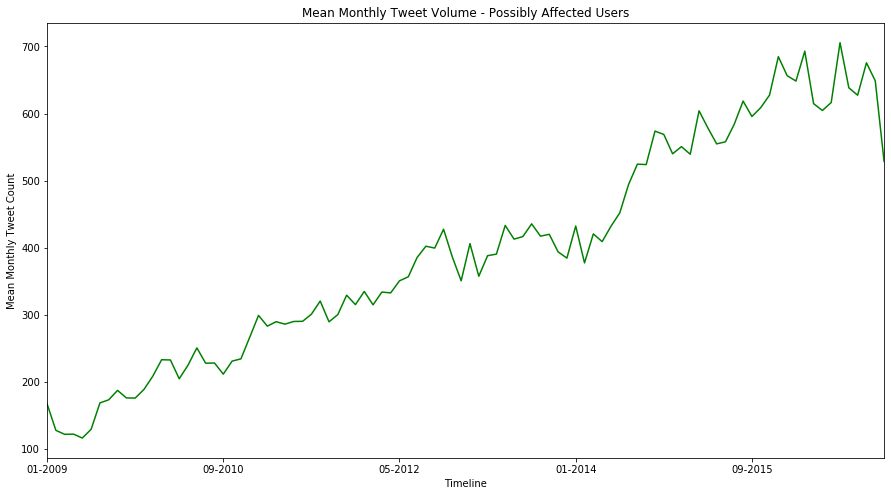

In [25]:
plt.figure()
tweet_countDF.mean().plot(kind='line', color='green', figsize=(15,8),title='Mean Monthly Tweet Volume - Possibly Affected Users')
# plt.legend(('Trump','Hillary'))
plt.ylabel('Mean Monthly Tweet Count')
plt.xlabel('Timeline')
# plt.savefig('PAU_graphics/pau_tweetcount.png')
plt.show()

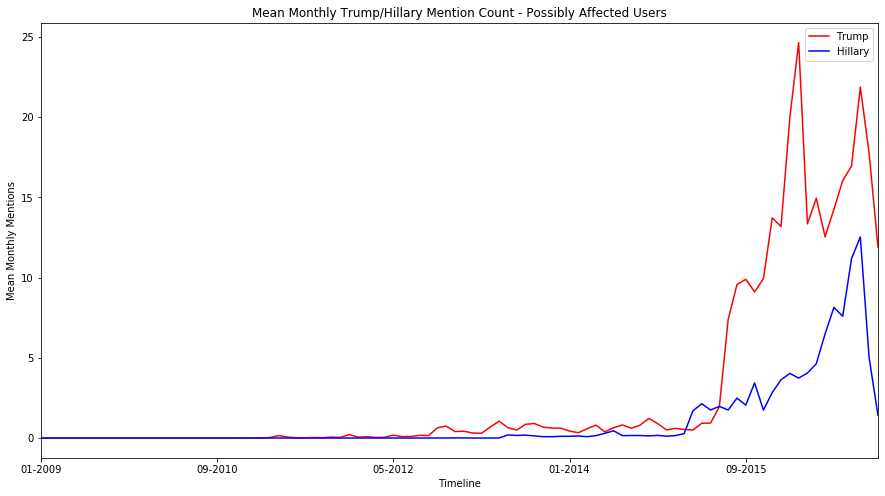

In [26]:
plt.figure()
trump_countDF.mean().plot(kind='line', color='red', figsize=(15,8),title='Mean Monthly Trump/Hillary Mention Count - Possibly Affected Users')
clinton_countDF.mean().plot(kind='line', color='blue', figsize=(15,8))
plt.legend(('Trump','Hillary'))
plt.ylabel('Mean Monthly Mentions')
# plt.savefig('PAU_graphics/pau_mentions.png')
plt.xlabel('Timeline')
plt.show()

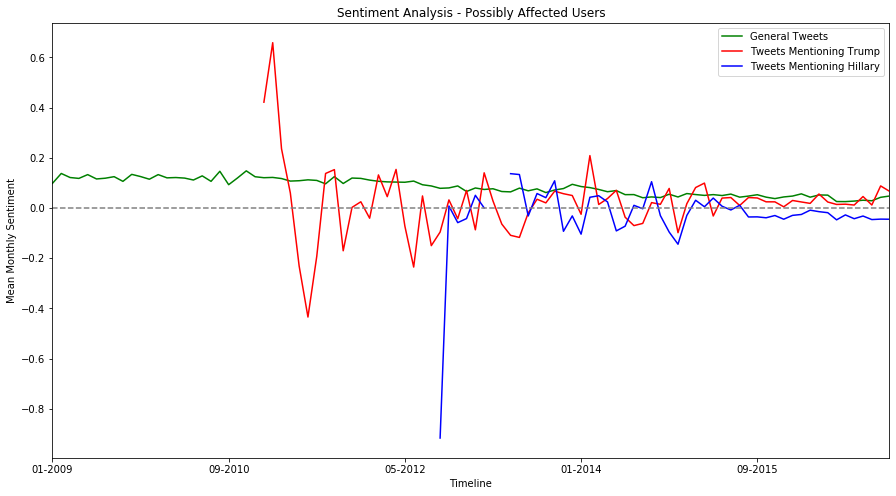

In [27]:
plt.figure()
sentiment_scoresDF.mean().plot(kind='line', color='green', figsize=(15,8),title='Sentiment Analysis - Possibly Affected Users')
trump_sentDF.mean().plot(kind='line', color='red', figsize=(15,8))
clinton_sentDF.mean().plot(kind='line', color='blue', figsize=(15,8))
plt.legend(('General Tweets','Tweets Mentioning Trump','Tweets Mentioning Hillary'))
plt.axhline(0, color="grey", linestyle="--")
plt.ylabel('Mean Monthly Sentiment')
# plt.savefig('PAU_graphics/pau_sentiment.png')
plt.xlabel('Timeline')
plt.show()